**Profit Prediction using Multiple Linear Regression by Azimatul Matsniya**


In [1]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Datetime
import datetime as dt

# Import module untuk train/test split 
from sklearn.model_selection import train_test_split

# Import regresi
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# Loading Dataset berupa data start-up company 
df = pd.read_csv('/content/50_Startups.csv')
print(df.head(3))
print(df.dtypes)
print(df.shape)

   rnd_spend  administration  marketing_spend       state     profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
rnd_spend          float64
administration     float64
marketing_spend    float64
state               object
profit             float64
dtype: object
(50, 5)


In [3]:
# Cek missing value
df.isna().sum()

rnd_spend          0
administration     0
marketing_spend    0
state              0
profit             0
dtype: int64

In [4]:
# cek data duplikat
df[df.duplicated()]

,rnd_spend,administration,marketing_spend,state,profit


In [5]:
# Menghitung average of profit, rnd_spend, administration, marketing_spend group by state 
top_state = df.groupby(['state'])['profit'].mean().reset_index().sort_values(by='profit',ascending=False)
top_state.set_index('state', inplace=True)

top_rnd = df.groupby(['state'])['rnd_spend'].mean().reset_index().sort_values(by='rnd_spend',ascending=False)
top_rnd.set_index('state', inplace=True)

top_admin = df.groupby(['state'])['administration'].mean().reset_index().sort_values(by='administration',ascending=False)
top_admin.set_index('state', inplace=True)

top_marketing = df.groupby(['state'])['marketing_spend'].mean().reset_index().sort_values(by='marketing_spend',ascending=False)
top_marketing.set_index('state', inplace=True)

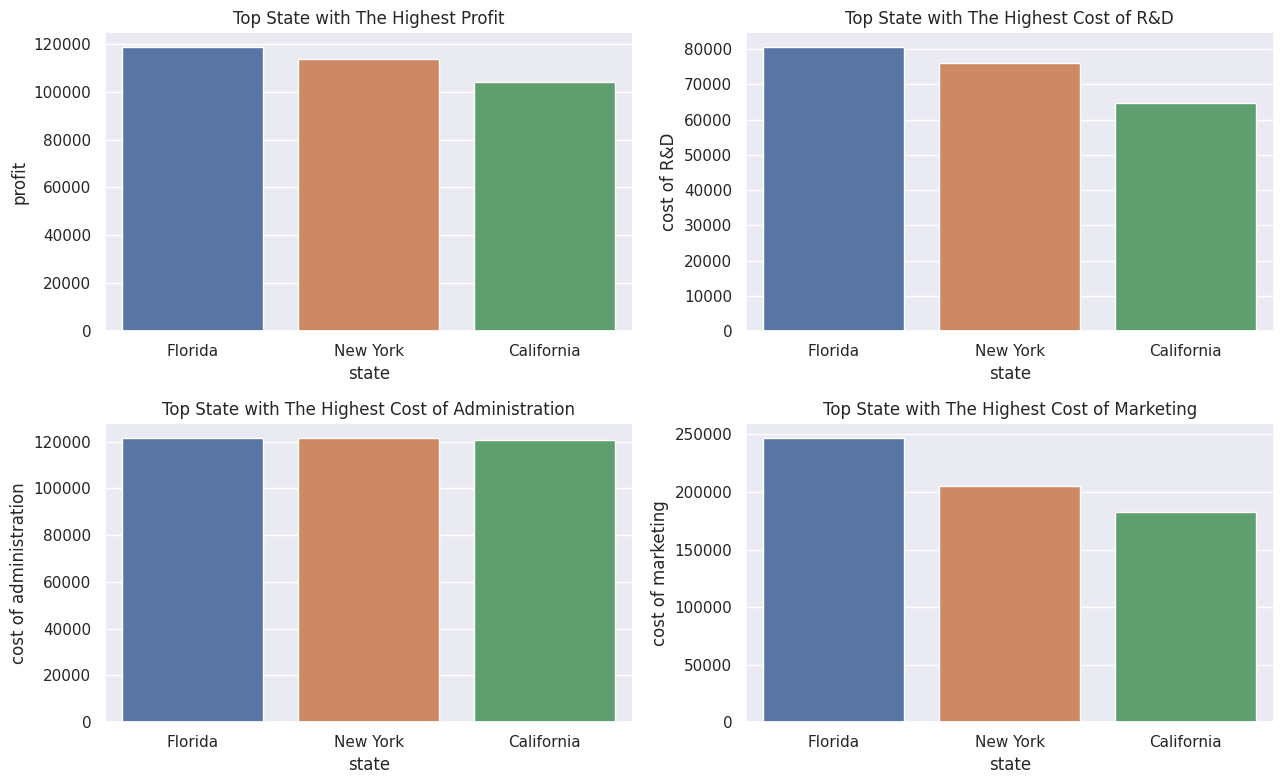

In [6]:
# Menggambar plot untuk Top State
plt.figure(figsize=(13,8))

plt.subplot(2,2,1)
sns.barplot(x=top_state.index, y=top_state.profit, order=top_state.index)
plt.title('Top State with The Highest Profit')
plt.xlabel('state')
plt.ylabel('profit')

plt.subplot(2,2,2)
sns.barplot(x=top_rnd.index, y=top_rnd.rnd_spend, order=top_rnd.index)
plt.title('Top State with The Highest Cost of R&D')
plt.xlabel('state')
plt.ylabel('cost of R&D')

plt.subplot(2,2,3)
sns.barplot(x=top_admin.index, y=top_admin.administration, order=top_admin.index)
plt.title('Top State with The Highest Cost of Administration')
plt.xlabel('state')
plt.ylabel('cost of administration')

plt.subplot(2,2,4)
sns.barplot(x=top_marketing.index, y=top_marketing.marketing_spend, order=top_marketing.index)
plt.title('Top State with The Highest Cost of Marketing')
plt.xlabel('state')
plt.ylabel('cost of marketing')

plt.tight_layout()
plt.show()

Terlihat bahwa dari keseluruhan plot diatas, Florida merupakan negara dengan profit tertinggi. Hal ini juga signifikan dengan rata-rata dari biaya yang dihabiskan untuk r&d, administration, da marketing. Maka, dapat dilihat terdapat hubungan antara mereka. 

In [7]:
# Mengambil data numeric saja
data = df.copy()
data.drop('state', axis=1, inplace=True)
data.head(3)

,rnd_spend,administration,marketing_spend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39


In [8]:
# Membuat summary statistik deskriptif dari data numerik
data.describe()

,rnd_spend,administration,marketing_spend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


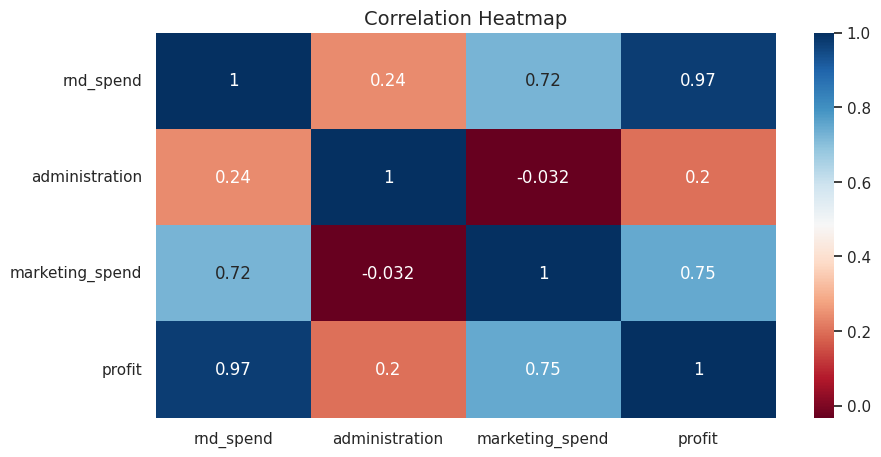

In [9]:
# Melihat matrik korelasi antar variabel  
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

Dari matriks korelasi tersebut dapat dilihat bahwa profit dan rnd_spend memiliki korelasi yang kuat dengan nilainya adalah 0,97. Selanjutnya, yang memiliki korelasi kuat dengan profit adalah marketing_spend. Administration memiliki hubungan yang paling lemah dengan variabel profit. Dari matriks korelasi ini, dapat diambil 2 variabel penting yang mempengaruhi profit yakni rnd_spend dan marketing_spend

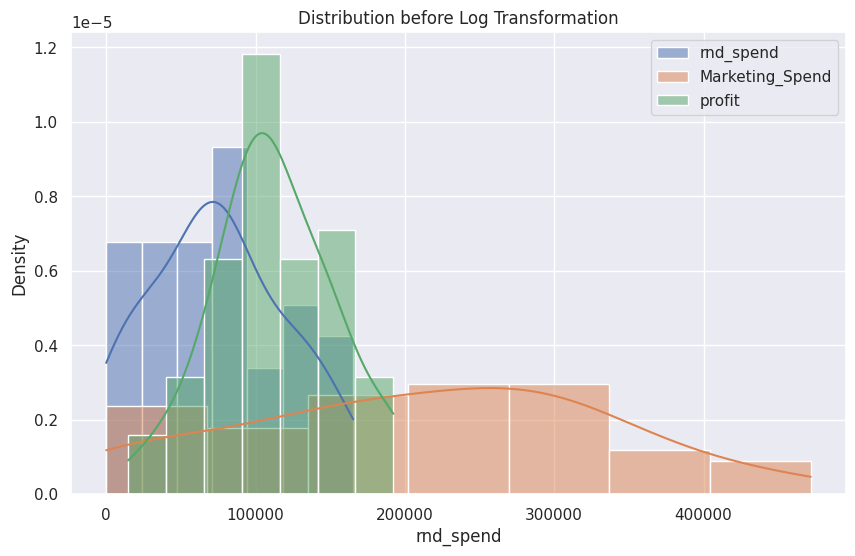

In [14]:
# Membuat plot distribusi untuk masing-masing variabel
plt.figure(figsize=(10,6))

#plt.subplot(1,3,1)
sns.histplot(data['rnd_spend'],label='rnd_spend', kde=True,stat="density")

#plt.subplot(1,3,1)
sns.histplot(data['marketing_spend'],label='Marketing_Spend', kde=True, stat="density")

#plt.subplot(1,3,1)
sns.histplot(data['profit'],label='profit', kde=True, stat="density")

plt.title('Distribution before Log Transformation')
plt.legend()
plt.show()

Dari distribusi plot tersebut, dapat dilihat bahwa distribusi masing-masing variabel dapat dikatakan sebagai distribusi normal karena membentuk bell-curved dan tidak condong ke kanan maupun ke kiri.

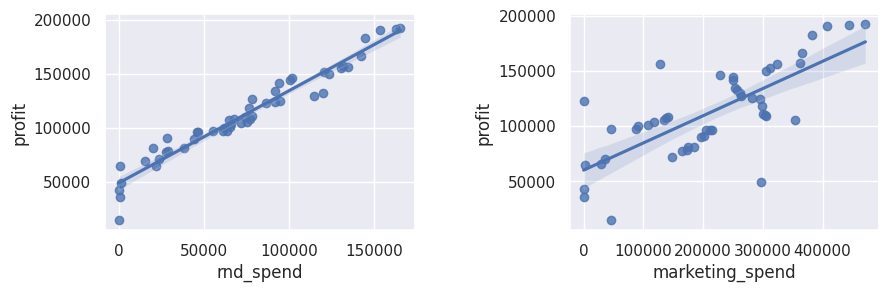

In [15]:
# Membuat plot untuk melihat linearitas dari masing-masing variabel
plt.figure(figsize=(10,7))
n = 0 
for x in ['rnd_spend','marketing_spend']:
    for y in ['profit']:
        n += 1
        plt.subplot(2 , 2 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

Dari plot tersebut dapat dilihat bahwa rnd_spend dan marketing_spend membentuk hubungan linier dengan variabel profit. Dapat dilihat juga garis regresi yang tergambar.

In [16]:
# Mendefinisikan variabel x dan y, Membagi data menjadi data training dan data testing
x = data[['rnd_spend','marketing_spend']]
y = data['profit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
# Membangun Model Regresil Linier Berganda

# with sklearn
regr = LinearRegression()
regr.fit(x_train, y_train)
r = regr.score(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('R squared Value Training: \n', r)

# with statsmodels
x = sm.add_constant(x) # adding a constant to predictor variables
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 46223.53254877434
Coefficients: 
 [0.8028213  0.03179095]
R squared Value Training: 
 0.950668737544617
                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 19 May 2023   Prob (F-statistic):           2.16e-31
Time:                        13:42:07   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------

Dari summary diatas dapat diambil kesimpulan untuk nilai masing-masing parameter. Didapatkan model regresinya adalah y = 49.321 + 0,8(rnd_spend) + 0,03(marketing_spend). 
Nilai R square sebesar 0,95 atau 95%. Hal ini menunjukkan bahwa model dapat menggambarkan keseluruhan data. Hasil tersebut menunjukkan bahwa Variabel rnd_spend dan marketing_spend memberikan pegaruh yang signifikansi terhadap variabel profit.
Nilai F-statistic juga kurang  dari alpha-value (5%) sehingga dapat dikatakan model regresi sangat baik.

In [18]:
# test
print('R squared Value Testing: \n', regr.score(x_test,y_test))
y_prediksi = regr.predict(x_test)
print(y_prediksi)

R squared Value Testing: 
 0.9459157929994643
[ 97598.70262551  82742.52004763 131199.62323942 118685.20263604
  59801.52798089 110960.73335673 117257.93192863 116936.58346592
 171951.17485044 103007.14356756]


Hasil R square testing juga menunjukkan angka yang baik yakni sebesar 0,90.